# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스
PCA (Princiapal Component Analysis) 클래스 
차원의 축소 알고리즘 : 특성의 축소 
1. 하나의 이미지는 100* 100 으로 구성된 100000의 특성을 가지고 있다. 
2. 주성분만 축출하여 특성을 줄이면 모델의 성능 향상
3. 

In [1]:
#!wget https://bit.ly/fruits_300_data -O fruits_300.npy

In [2]:
import numpy as np


fruits = np.load('./fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [3]:
from sklearn.decomposition import PCA

# 주성분 50개 지정 -> n_components=50 
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)
#n_compontes= 50 만큼 줄였음. 


(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

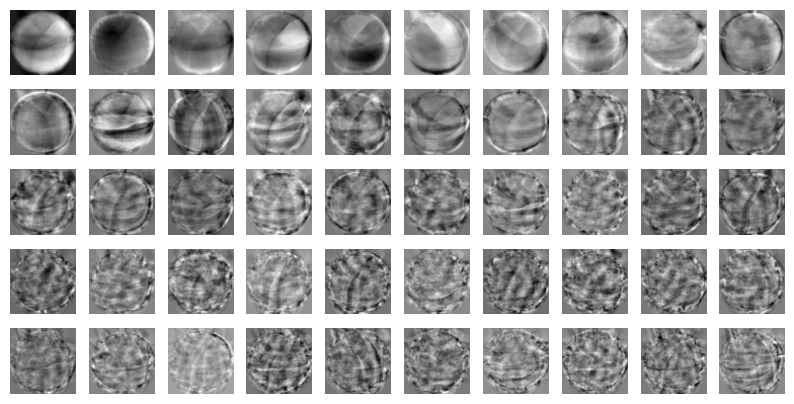

In [5]:
# 성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다. 

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
# 1/200
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)

In [10]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

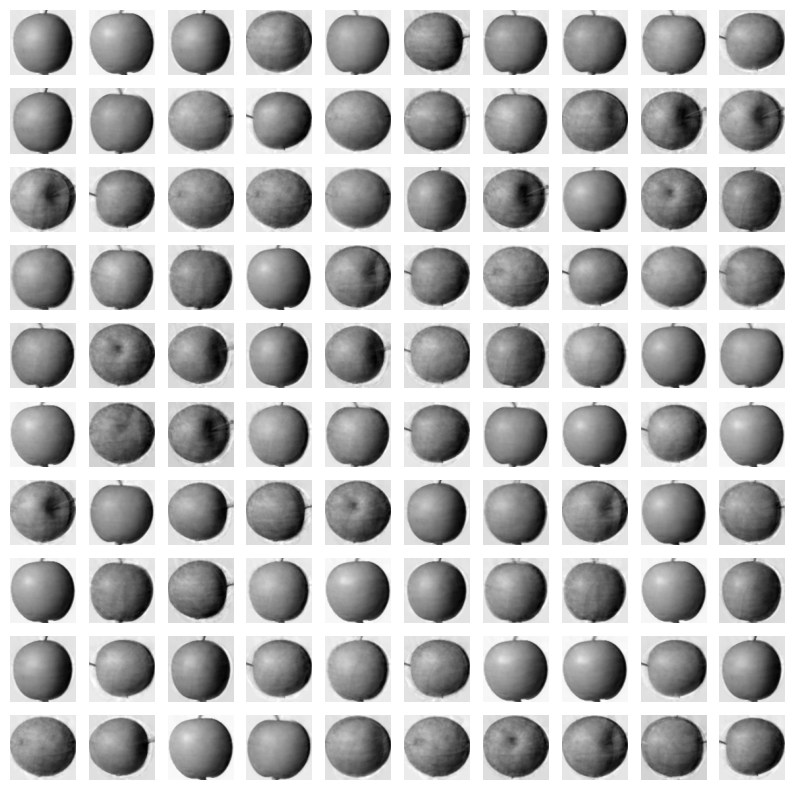

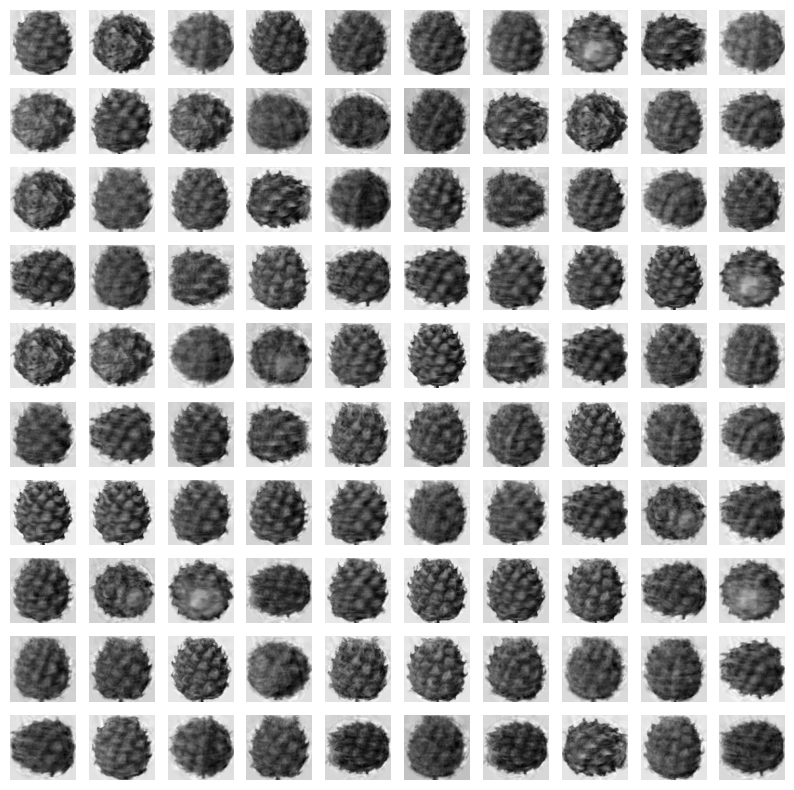

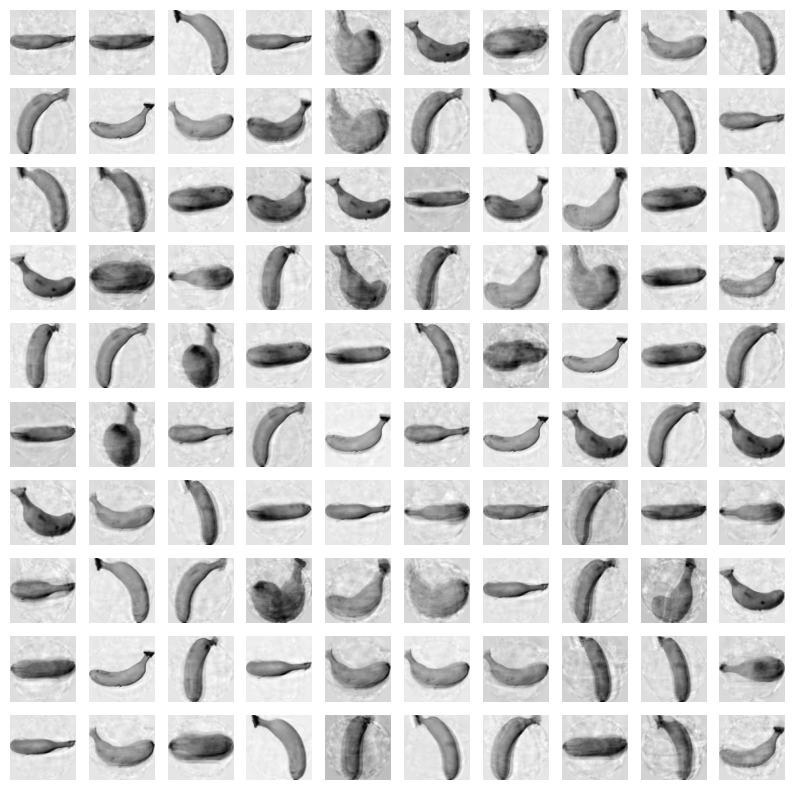

In [13]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9214555913782738


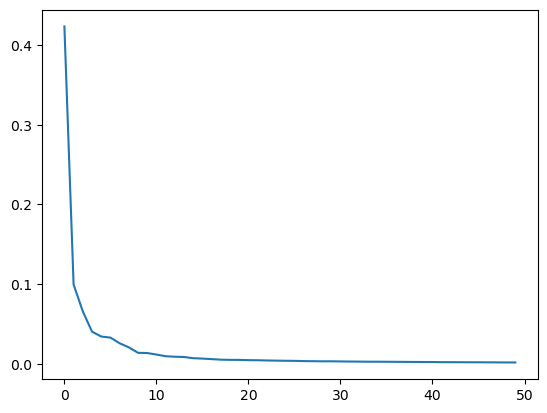

In [15]:
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA 로 축소한 데이터를 지도 학습에 적용해서 어떤 차이가 있는지 알아보자 


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [18]:
#타겟 데이터 셋트 먼저 만듬 

target = np.array([0] * 100 + [1] * 100 + [2] * 100)


In [19]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.3765760898590088


In [24]:
print(type(scores))
print(scores)

<class 'dict'>
{'fit_time': array([0.01809096, 0.0069139 , 0.008919  , 0.00408912, 0.00638795]), 'score_time': array([0.00028086, 0.00021315, 0.00025988, 0.000175  , 0.00014806]), 'test_score': array([1., 1., 1., 1., 1.])}


In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.008880186080932616


In [19]:
# 이전 축소된 클래스에서 다시 50% 축소

pca = PCA(n_components=0.5)

pca.fit(fruits_2d)

PCA(n_components=0.5)

In [20]:
print(pca.n_components_)

2


In [21]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03713240623474121


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [24]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


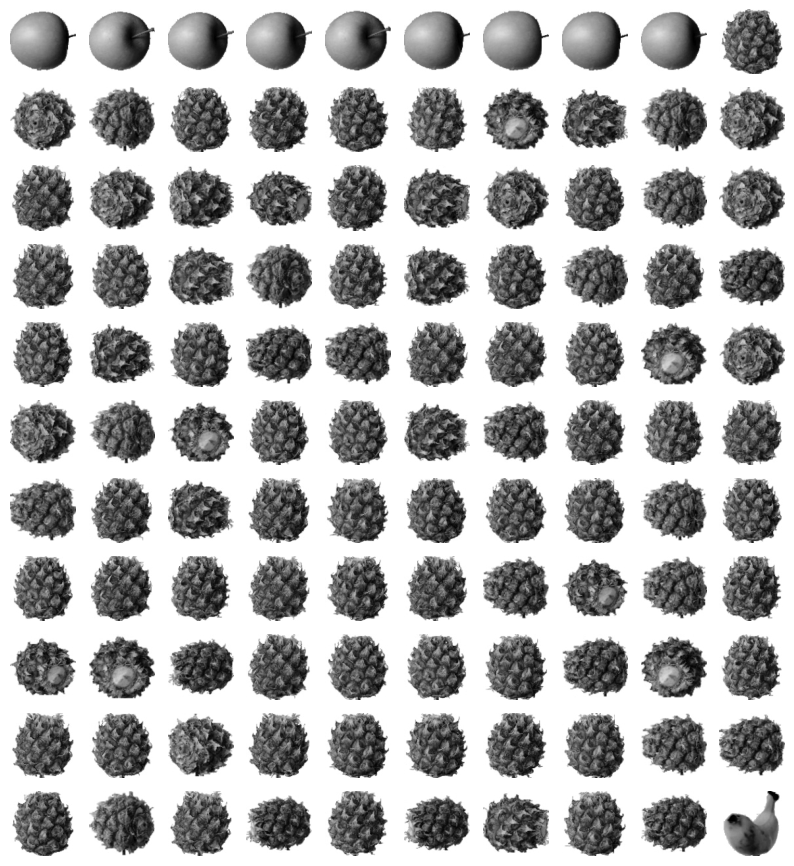

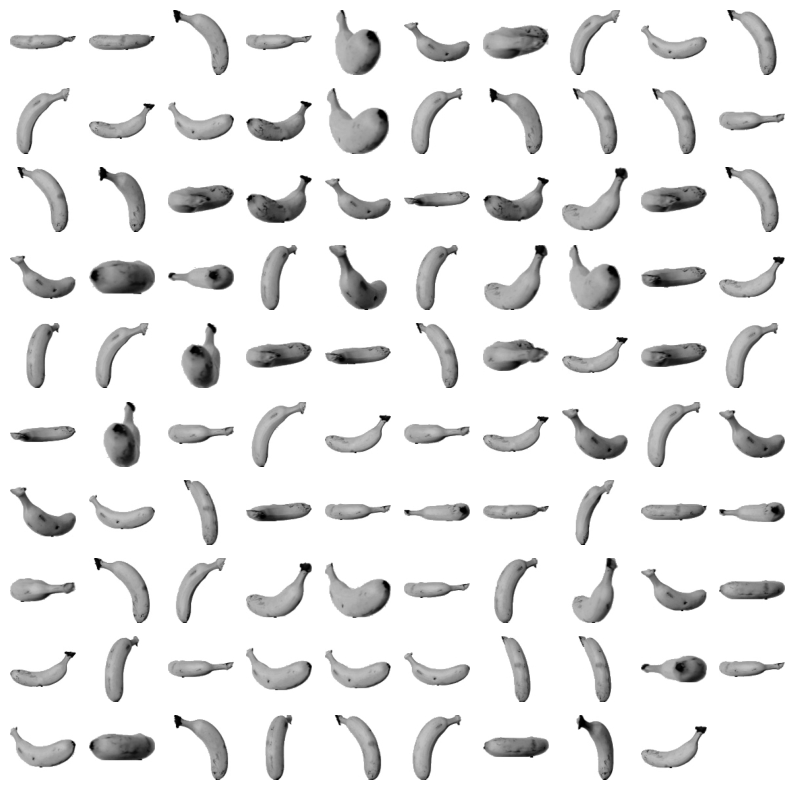

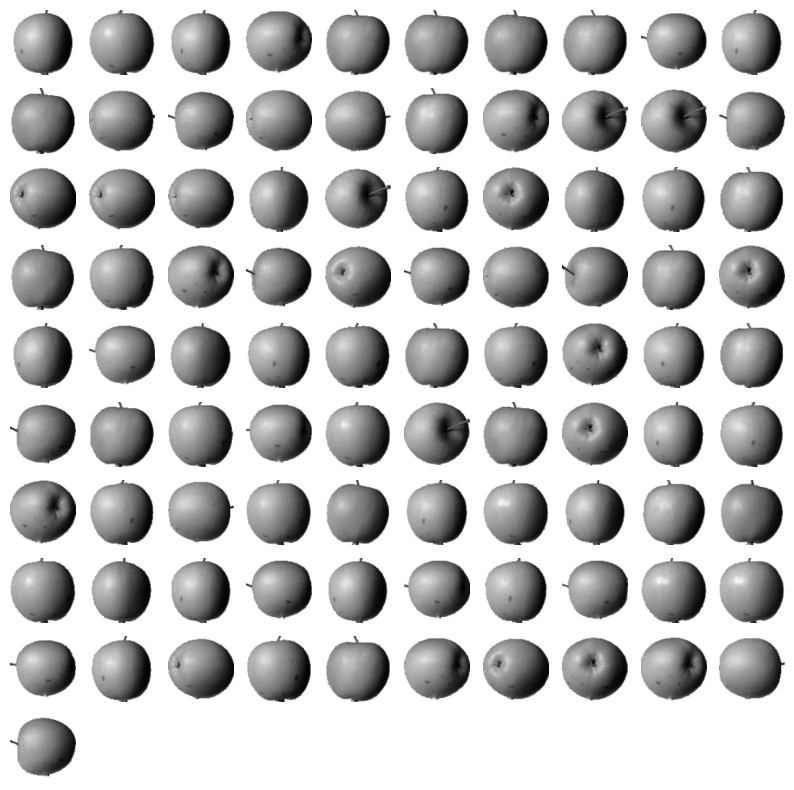

In [25]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

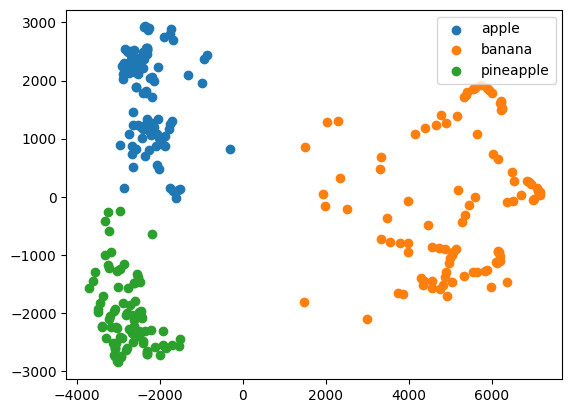

In [26]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()